# Poetry Generator

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Define Parameters

In [18]:
filepath = "romio_juliet.txt"
save_file_path = 'romio_juliet_predicted.txt'
PADDING = 'pre'
TRUNC = 'pre'

VOCAB_SIZE = 10000
EMB_DIM = 128

OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['acc']
EPOCHS = 50
BATCH_SIZE = 128
VAL_SPLIT = 0.1

SEEDER = 'That shows thee'    ## Seeder word to start prediction of poetry
NUM_PREDICTIONS = 1000

model_name = filepath[:-4] + "_model.h5"

data = "This is some random statement \n being used as placeholder for the actual data that is to be \n imported later from a file."

## Load Data

In [3]:
with open(filepath) as f:
    data = f.read()
    f.close()
data = data.replace('\n', ' \n<>')
sentences = data.lower().split('<>')
print(len(sentences))
print(sentences[1])
print(len(sentences[1]))

4316
prologue 

10


## Tokenize Data

In [4]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(total_words)
print(word_index['\n'])

3765
1


In [5]:
## create reverse_word_index
reverse_word_index = {}
for word, i in word_index.items():
    reverse_word_index[i] = word
print(reverse_word_index[1])

## Change Sentences to Sequences

In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
new_seq = []
for row in sequences:
    for i in range(2, len(row)+1):
        new_seq.append(row[:i])
padded_seq = pad_sequences(new_seq, padding=PADDING, truncating=TRUNC)
print(padded_seq[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 454   4]


## Extract trainX and trainY from sequences

In [7]:
trainX = padded_seq[:,:-1]
trainY = padded_seq[:,-1]
trainY = tf.keras.utils.to_categorical(trainY, num_classes=total_words)

INP_LEN = trainX.shape[1]
OUT_LEN = trainY.shape[1]

print(trainX.shape)
print(trainY.shape)

(25919, 16)
(25919, 3765)


## Define Callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, log={}):
        if (log.get('acc')>0.90):
            self.model.stop_training = True
            print("\n Stopped training since model reached accuracy of 90%")
callback = myCallback()

## Define Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, EMB_DIM, input_length=INP_LEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 128)           481920    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 3765)              244725    
Total params: 767,861
Trainable params: 767,861
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [11]:
history = model.fit(trainX, trainY, validation_split=VAL_SPLIT, verbose=1, epochs = EPOCHS, batch_size=BATCH_SIZE, callbacks=[callback])

Train on 23327 samples, validate on 2592 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
23327/23327 [==============================] - 16s 692us/sample - loss: 6.4833 - acc: 0.1581 - val_loss: 6.0512 - val_acc: 0.1562
Epoch 2/50
23327/23327 [==============================] - 13s 541us/sample - loss: 5.8412 - acc: 0.1606 - val_loss: 6.0262 - val_acc: 0.1562
Epoch 3/50
23327/23327 [==============================] - 13s 546us/sample - loss: 5.7504 - acc: 0.1605 - val_loss: 6.0438 - val_acc: 0.1555
Epoch 4/50
23327/23327 [==============================] - 13s 550us/sample - loss: 5.6906 - acc: 0.1581 - val_loss: 6.0658 - val_acc: 0.1539
Epoch 5/50
23327/23327 [==============================] - 14s 582us/sample - loss: 5.6430 - acc: 0.1576 - val_loss: 6.0761 - val_acc: 0.1528
Epoch 6/50
23327/23327 [==============================] - 14s 592us/sample - loss: 5.6034 - acc: 0.1588 - val_loss: 6.0888 - val_acc: 0.1566
Epoch 7/50
23327/23327 [==============================] -

## Save Model

In [13]:
model.save(model_name)

## Plot Results

C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\XARC\Anaconda3\lib\site-p

<Figure size 432x288 with 0 Axes>

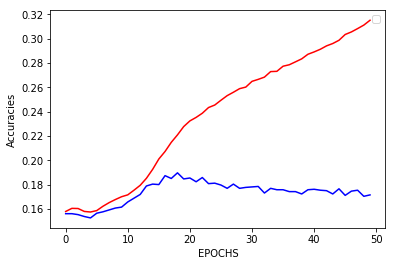

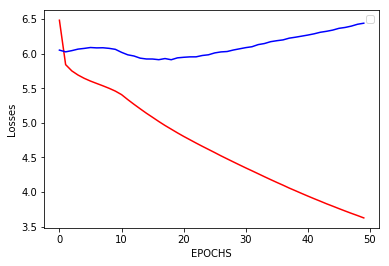

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracies')
plt.legend('Train Acc', 'Val Acc')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Losses')
plt.legend('Train Loss', 'Val Loss')
plt.figure()

## Generate Poetry by iterating over the predictor from the model

In [19]:
sentence = SEEDER.lower()
corpus = SEEDER.lower()
new_line = False
print (sentence, end=' ')
for i in range(NUM_PREDICTIONS):
    seq = tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, padding=PADDING, truncating=TRUNC, maxlen=INP_LEN)
    new_word = model.predict_classes(seq)
    new_word = reverse_word_index[new_word[0]]
    if new_line:
        corpus += new_word
        new_line = False
    else:
        corpus += ' ' + new_word
    
    if new_word=='\n':
        sentence = reverse_word_index[seq[0][-1]]
        new_line = True
        print (new_word, end='')
        #sentence = reverse_word_index[random.randint(1, total_words)]
    else:
        sentence += ' ' + new_word
        print (new_word, end=' ')


that shows thee to the house of the house 































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































## Save Poetry in a file

In [49]:
try:
    with open(save_file_path, 'w') as f:
        f.write(corpus)
        f.close()
except:
    print("\nWrite was Unsuccessful")